In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns;sns.set();
from sklearn.datasets._samples_generator import make_blobs


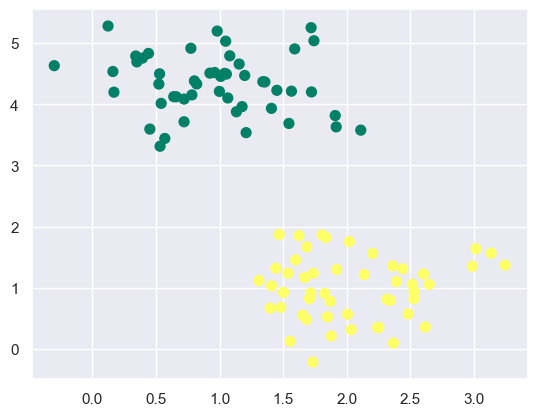

In [3]:
X , y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.50)
plt.scatter(X[:,0],X[:,1],c = y , s = 50 , cmap='summer');


(-1.0, 3.5)

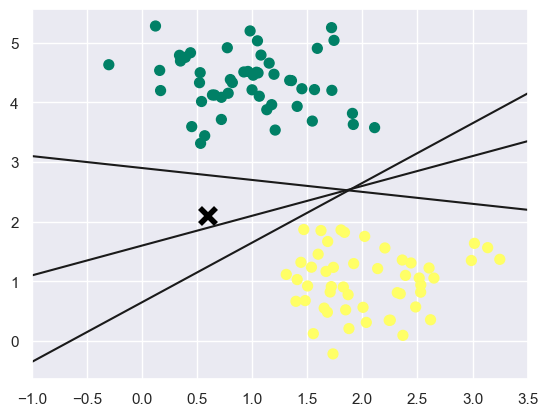

In [10]:
xfit = np.linspace(-1,3.5) 
plt.scatter(X[:,0],X[:,1],c = y , s = 50 , cmap='summer');
plt.plot([0.6], [2.1], 'x', color='black', markeredgewidth=4, markersize=12)
for m  ,b  in [(1,0.65) , (0.5,1.6),(-0.2,2.9)] : 
    plt.plot(xfit,m*xfit + b , '-k')
plt.xlim(-1,3.5)

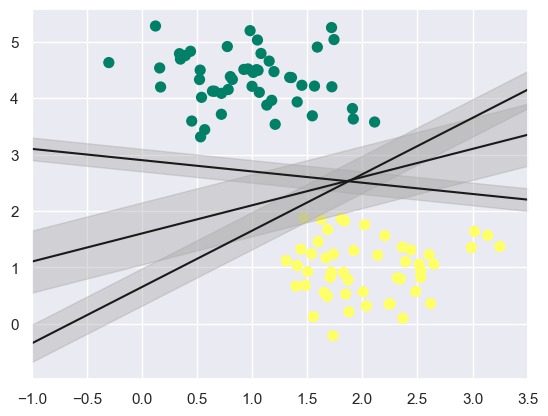

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

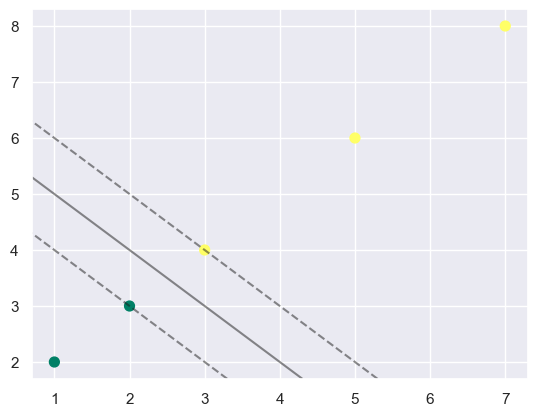

In [25]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 0, 1, 1, 1])

# Create an SVC model with a linear kernel and a large value of C
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Define the decision_function function with the 'ax' parameter
def decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid for evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundaries and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Create the scatter plot of the data points and use the decision_function function
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
decision_function(model, plt.gca())  # Pass plt.gca() as 'ax' to use the current axis
plt.show()
